In [1]:
import os
os.chdir('..')

In [11]:
import googlemaps
from shapely.geometry import Polygon
import geopandas
from matplotlib import pyplot as plt


from src.optimal_route_ga import OptimalRoute

In [5]:
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')

In [6]:
all_waypoints = ["Kalamaria, Greece",
                 "Grevena, Greece",
                 "Olympos, Greece",
                 "Kalampaka, Greece",
                 "Metsovo, Greece",
                "Katerini, Greece",
                "Trikala, Greece",
                "kilkis, Greece",
                'kozani, Greece',
                'Salamina, Greece']

In [7]:
OptimalRoute_kalamaria_milan = OptimalRoute(waypoint_combinations_distance_df=None,waypoints_lst = all_waypoints,api_key=GOOGLE_API_KEY,verbose=False)
optimal_route = OptimalRoute_kalamaria_milan.run_genetic_algorithm()
optimal_route

('Trikala, Greece',
 'Salamina, Greece',
 'Olympos, Greece',
 'Katerini, Greece',
 'Kalamaria, Greece',
 'kilkis, Greece',
 'kozani, Greece',
 'Grevena, Greece',
 'Metsovo, Greece',
 'Kalampaka, Greece')

In [23]:
optimal_route_lat_lst = []
optimal_route_lng_lst = []
gmaps = googlemaps.Client(key=GOOGLE_API_KEY)
for destination in optimal_route:
    resp = gmaps.geocode(destination)
    optimal_route_lng_lst.append(resp[0]['geometry']['location']['lng'])
    optimal_route_lat_lst.append(resp[0]['geometry']['location']['lat'])

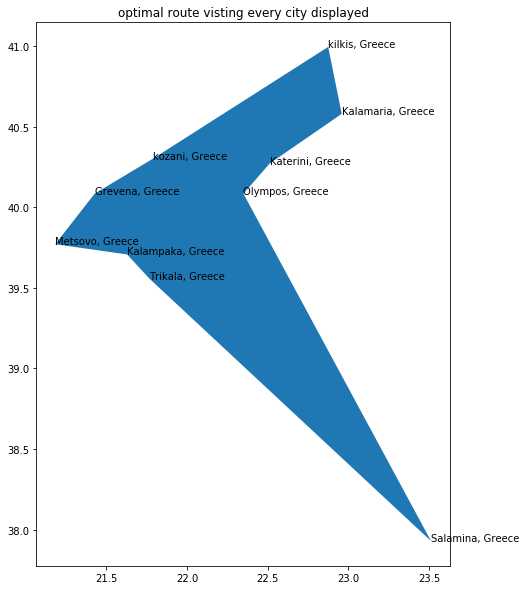

In [25]:
optimal_route_polygon = geopandas.GeoSeries(Polygon(zip(optimal_route_lng_lst,optimal_route_lat_lst)))
optimal_route_polygon.plot(figsize=(10,10))
for k, coor in enumerate(zip(optimal_route_lng_lst,optimal_route_lat_lst)):
    plt.text(coor[0], coor[1], optimal_route[k], fontsize=10)
plt.title('optimal route visting every city displayed')
plt.show()